# Ensemble Fraud Detection

### Part a)

In [23]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [40]:
import pandas as pd
import numpy as np
import os

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [25]:
columns = [f"A{i}" for i in range (1,16)]

data = pd.read_csv("./australian.dat", names=columns, delimiter=" ")

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [26]:
data.shape

(690, 15)

In [27]:
data.isna().sum().sum()

0

In [28]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [29]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212,0.0
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000,0.0
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000,0.0
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000,1.0
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158,1.0


### Part b)

In [30]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forrest

In [32]:
# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 20, 50, 100, 200, 300],
    'max_depth': [5, 10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              verbose=1, 
                              n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Predict on the test set using the best model
rf_best_model = grid_search_rf.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

# Evaluate the Random Forest model
rf_f1 = f1_score(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Best Parameters: {grid_search_rf.best_params_}")
print(f"Random Forest F1 Score: {rf_f1*100: .2f}%")
print(f"Random Forest Accuracy: {rf_accuracy*100: .2f}%")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest F1 Score:  83.17%
Random Forest Accuracy:  87.68%


AdaBoost

In [33]:
# Parameter grid for AdaBoost
param_grid_adb = {
    'n_estimators': [10, 20, 50, 100, 150, 200, 500],
    'learning_rate': [0.001, 0.005, 0.01, 0.1, 0.2, 1.0, 5, 10]
}

# Initialize the GridSearchCV object for AdaBoost
grid_search_adb = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), 
                               param_grid=param_grid_adb, 
                               cv=5, 
                               verbose=1, 
                               n_jobs=-1)

# Fit the grid search to the data for AdaBoost
grid_search_adb.fit(X_train, y_train)

# Predict on the test set using the best model
adb_best_model = grid_search_adb.best_estimator_
adb_predictions = adb_best_model.predict(X_test)

# Evaluate the AdaBoost model
adb_f1 = f1_score(y_test, adb_predictions)
adb_accuracy = accuracy_score(y_test, adb_predictions)

print(f"AdaBoost Best Parameters: {grid_search_adb.best_params_}")
print(f"AdaBoost F1 Score: {adb_f1*100:.2f}%")
print(f"AdaBoost Accuracy: {adb_accuracy*100:.2f}%")


Fitting 5 folds for each of 56 candidates, totalling 280 fits
AdaBoost Best Parameters: {'learning_rate': 0.01, 'n_estimators': 500}
AdaBoost F1 Score: 81.48%
AdaBoost Accuracy: 85.51%


XGBoost

In [34]:
# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [10, 20, 50, 100, 200, 300, 500],
    'max_depth': [1, 2, 3, 6, 9, 10, 15, 20, 50, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 10]
}

# Initialize the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), 
                               param_grid=param_grid_xgb, 
                               cv=5, 
                               verbose=1, 
                               n_jobs=-1)

# Fit the grid search to the data for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Predict on the test set using the best model
xgb_best_model = grid_search_xgb.best_estimator_
xgb_predictions = xgb_best_model.predict(X_test)

# Evaluate the XGBoost model
xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"XGBoost Best Parameters: { grid_search_xgb.best_params_}")
print(f"XGBoost F1 Score: {xgb_f1*100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy*100:.2f}%")

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
XGBoost Best Parameters: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 20}
XGBoost F1 Score: 80.00%
XGBoost Accuracy: 85.51%


### Part c)

In [35]:
conf_mats = []

conf_mats.append(confusion_matrix(y_true=y_test, y_pred=adb_predictions))
conf_mats.append(confusion_matrix(y_true=y_test, y_pred=xgb_predictions))
conf_mats.append(confusion_matrix(y_true=y_test, y_pred=rf_predictions))

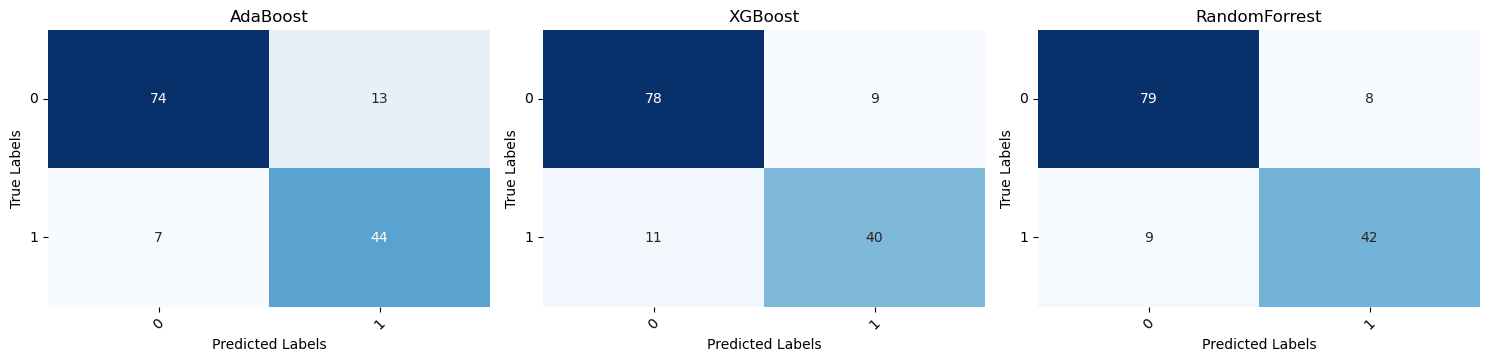

In [52]:
model_names = ["AdaBoost", "XGBoost", "RandomForrest"]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
axs = axs.flatten()

for i, name in enumerate(model_names):
    plt.subplot(3, 3, i+1)
    sns.heatmap(conf_mats[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[i])
    axs[i].set_xlabel('Predicted Labels')
    axs[i].set_ylabel('True Labels')
    axs[i].set_title(name)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

# Removing empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

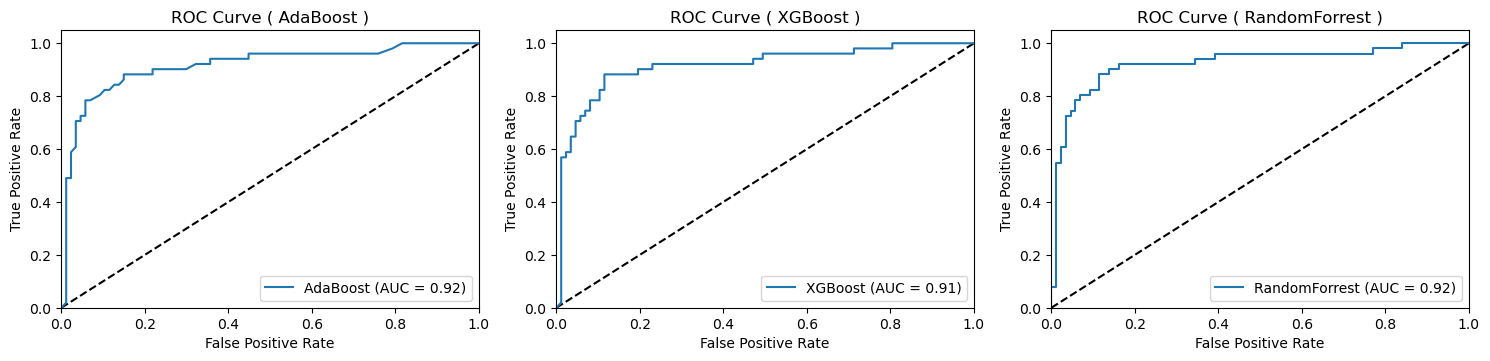

In [51]:
models = [adb_best_model, xgb_best_model, rf_best_model]


fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    plt.subplot(3, 3, i+1)
 
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculating the Area Under the ROC Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Ploting the Random Guess Line
    plt.plot([0, 1], [0, 1], 'k--')  
    
    # Plotting the ROC curve
    axs[i].plot(fpr, tpr, label=f"{model_names[i]} (AUC = {roc_auc:.2f})" )
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f"ROC Curve ( {model_names[i]} )")
    plt.legend(loc="lower right")

# Removing empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [37]:
ada_f1 = f1_score(y_test, adb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

ada_auc = roc_auc_score(y_test, adb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)

print(f'AdaBoost F1 Score: {ada_f1*100:.2f}%')
print(f'XGBoost F1 Score: {xgb_f1*100:.2f}%')
print(f'RandomForest F1 Score: {rf_f1*100:.2f}%')
print()
print(f'AdaBoost ROC AUC Score: {ada_auc:.2f}')
print(f'XGBoost ROC AUC Score: {xgb_auc:.2f}')
print(f'RandomForest ROC AUC Score: {rf_auc:.2f}')

AdaBoost F1 Score: 81.48%
XGBoost F1 Score: 80.00%
RandomForest F1 Score: 83.17%

AdaBoost ROC AUC Score: 0.86
XGBoost ROC AUC Score: 0.84
RandomForest ROC AUC Score: 0.87
